# Robust One-Dimensional Mean Estimation

<font color='green'>In this practical session, we take a look at the problem of estimating the mean of a real-valued random variable with bounded variance.
Our main objectives are the following:
</font>
- <font color='green'>formulating the mean estimation problem within the framework introduced in lecture 1;</font>
- <font color='green'>formulating a precise goal;</font>
- <font color='green'>understanding in what cases the "usual" sample-mean estimator meets our goal;</font>
- <font color='green'>motivating the need for non-asymptotic analysis;</font>
- <font color='green'>gaining some working practice with simple concentration inequalities;</font>
- <font color='green'>presenting the derivation of a nearly optimal mean estimator due to Olivier Catoni.</font>

Let us now formulate our problem more precisely. We want to estimate the mean of a real-valued random variable $Z \sim P$, where $P$ is an unknown distribution with finite variance $\mathbf{E}_{Z \sim P}[(Z - \mathbf{E}Z)^{2}] \leq \sigma^{2} < \infty$.

To put this problem in the framework introduced in lecture 1, let $\mathcal{A} = \mathbb{R}$ and let $Z_{1}^{n} = (Z_{i})_{i=1}^{n}$ denote a sample on $n$ i.i.d. draws from the unknown distribution $P$. We assume that the distribution $P$ is itself a member of a restricted family of distributions with variance at most $\sigma^{2}$, that is, $P \in \mathcal{P}_{\sigma^{2}} = \{P : \mathbf{E}_{Z \sim P}[(Z - \mathbf{E}_{Z\sim P}[Z])^{2})]\leq \sigma^{2}\}$. We aim to obtain an estimator $A = A(Z_{1}, \dots, Z_{n}) \in \mathcal{A}$ with a small *estimation error*
\begin{equation}
  \mathcal{E}_{P}(A) = (A - \mathbf{E}[Z])^{2}. \tag{1}
\end{equation}
<font color='green'>**To check our understanding, the next exercise asks to show that $\mathcal{E}_{P}(A)$ indeed matches the definition of estimation error introduced in lecture 1.**</font>

### Exercise 1

Show that the estimation error $\mathcal{E}_{P}(A)$ defined in equation $(1)$ matches the definition of estimation error introduced in lecture 1.

More specifically, letting $\mathcal{A} = \mathbb{R}$ find a loss function $\ell : \mathcal{A} \times \mathbb{R} \to [0, \infty)$ such that
$$
  \mathcal{E}_{P}(A) = \mathbf{E}_{Z \sim P}[\ell(A, Z)] - \inf_{a \in \mathcal{A}} \mathbf{E}_{Z\sim P}[\ell(a, Z)].
$$

#### Solution

Let $\ell(a, z) = (a - z)^{2}$. Then, we have
$$
  \inf_{a \in \mathcal{A}} \mathbf{E}_{Z \sim P}[(a - Z)^{2}] = \mathbf{E}_{Z \sim P}[(\mathbf{E}[Z] - Z)^{2}].
$$
Conditionally on the observed samples $Z_{1}, \dots, Z_{n}$ treat $A = A(Z_{1}, \dots, Z_{n})$ as a fixed value. Then, it follows that
\begin{align*}
  &\mathbf{E}_{Z \sim P}[\ell(A, Z)] - \inf_{a \in \mathcal{A}} \mathbf{E}_{Z\sim P}[\ell(a, Z)]
  \\
  &= 
  \mathbf{E}_{Z \sim P}[(A - Z)^2] - \mathbf{E}_{Z \sim P}[(\mathbf{E}[Z] - Z)^{2}]
  \\
  &= 
  \mathbf{E}_{Z \sim P}[(A - \mathbf{E}[Z] + \mathbf{E}[Z] - Z)^2] - \mathbf{E}_{Z \sim P}[(\mathbf{E}[Z] - Z)^{2}]
  \\
  &= 
  \mathbf{E}_{Z \sim P}[(A - \mathbf{E}[Z])^{2}]
  +2\mathbf{E}_{Z\sim P}[(A - \mathbf{E}[Z])(\mathbf{E}[Z] - Z)]
  \\
  &=
  \mathbf{E}_{Z \sim P}[(A - \mathbf{E}[Z])^{2}]
  +2(A - \mathbf{E}[Z])
     \mathbf{E}_{Z\sim P}[\mathbf{E}[Z] - Z] &\text{since }A\text{ is independent of }Z
  \\
  &=
  \mathbf{E}_{Z \sim P}[(A - \mathbf{E}[Z])^{2}]
  \\
  &=
  (A - \mathbf{E}[Z])^{2}
  \\
  &=
  \mathcal{E}_{P}(A).
\end{align*}

## Formulating our Goal

In order to formulate a precise goal, we begin by taking a look at a simple case
of estimating the mean of a Gaussian random variable. Thus, for now, we fix $P \in \mathcal{P}_{\sigma^{2}}$ to be the Gaussian distribution with mean $\mu \in \mathbb{R}$ and variance $\sigma^{2}$, i.e., $P = N(\mu, \sigma^{2})$.

Run the next code cell to import the packages to be used in our simulations. 

In [1]:
import numpy as np # For manipulating vectors.
from matplotlib import pyplot as plt # For plotting.
from scipy.stats import norm # For computations related to the Gaussian CDF.

Consider the estimator that minimizes the empirical risk
$$
A^{(ERM)} = \mathrm{argmin}_{a \in \mathbb{R}} R(a),
\quad\text{where}\quad R(a) = \frac{1}{n}\sum_{i=1}^{n}(a - Z_{i})^{2}.
$$
Note that $A^{(ERM)}$ is arguably the most natural choice for estimating the mean $\mathbf{E}[Z]$ since it is equal to the *sample mean*:
$$
  A^{(ERM)} = \frac{1}{n}\sum_{i=1}^{n}Z_{i}.
$$

When $P = N(\mu, \sigma^{2})$, then $A^{(ERM)} \sim N(\mu, \sigma^{2}/n)$
and in particular, for any $t \in \mathbb{R}$ we have
\begin{align*}
  \mathbb{P}_{Z_{1}^{n}}\left(
    \mathcal{E}_{P}(A^{(ERM)}) \geq t^{2}
  \right)
  &=
  \mathbb{P}_{Z_{1}^{n}}\left(
    \left|A^{(ERM)} - \mu\right| \geq t
  \right)
  \\
  &=
  \mathbb{P}_{Z_{1}^{n}}\left(
    \left|N(0, \sigma^{2}/n)\right| \geq t
  \right)
  \\
  &=
  \mathbb{P}_{Z_{1}^{n}}\left(
    \left|N(0, 1)\right| \geq \frac{\sqrt{n}t}{\sigma}
  \right)
  \\
  &= 2\left(1 - \Phi(\sqrt{n}t/\sigma)\right), \tag{2}
\end{align*}
where $\Phi(\cdot)$ denotes the cumulative density function of the standard normal random variable $N(0,1)$.

Notice that by the above calculations, providing upper bounds on the estimation error $\mathcal{E}_{P}(A)$ is equivalent to providing *confidence intervals* for our estimates, i.e., upper bounds on $|A^{(ERM)} - \mu|$ that hold with probability at least $1-\delta$ for the chosen confidence level $\delta \in (0,1)$.
We thus want to  compute the smallest value $t_{\delta}$ such that
$$
 \mathbb{P}_{Z_{1}^{n}}\left(
    \left|A^{(ERM)} - \mu\right| \geq t_{\delta}
  \right)
  \leq \delta.
$$
For the sample mean estimator $A^{(ERM)}$ and the special case when $P$ is Gaussian, the value $t_\delta$ can be computed via equation $(2)$ by letting
\begin{align*}
  &\delta = 2\left(1 - \Phi(\sqrt{n}t_{\delta}/\sigma)\right)
  \\
  \implies&
  t_{\delta} = \frac{\Phi^{-1}(1 - \delta/2)\sigma}{\sqrt{n}}.
\end{align*}
In particular, we have
$$
  \mathbb{P}_{Z_{1}^{n}}\left(
    \left|A^{(ERM)} - \mu\right| \geq \frac{\Phi^{-1}(1 - \delta/2)\sigma}{\sqrt{n}}
  \right)
  \leq \delta.
$$

The inverse cumulative density function $\Phi^{-1}$ of the standard normal distribution cannot be expressed in terms of elementary functions. However, the following upper bound yields an analytically convenient approximation: $\Phi^{-1}(1 - \delta/2) \leq \sqrt{2\log(2/\delta)}$.
When the distribution of a random variable $Z$ is Gaussian, we can rewrite the above confidence bound into its slightly looser counterpart
$$
  \mathbb{P}_{Z_{1}^{n}}\left(
    \left|A^{(ERM)} - \mu\right| \geq \frac{\sigma\sqrt{2 \log(2/\delta)}}{\sqrt{n}}
  \right)
  \leq \delta.
$$
The above inequality motivates the definition of $L$-sub-Gaussian mean estimators.

---

> **Definition**
>
> An estimator $A$ is called $L$-sub-Gaussian for a family of distributions $\mathcal{P} \subseteq \mathcal{P}_{\sigma^{2}}$ at confidence level $\delta \in (0,1)$ if
$$
  \sup_{P \in \mathcal{P}} \left\{
    \mathbb{P}_{Z_{1}^{n} \sim P^{n}}\left(
      \left|A - \mathbf{E}_{Z\sim P}[Z]\right|
      \geq L\sigma\sqrt{\frac{\log(2/\delta)}{n}}
    \right)
  \right\}
  \leq \delta
$$

---

Intuitively, an estimator is $L$-sub-Gaussian if for any distribution in some set of interest it performs as well as the sample mean estimator when the underlying distribution is Gaussian. The constant $L = \sqrt{2}$ is the best one can hope for (see the bibliographic remarks section for references).

<font color='green'>**We can thus formulate a precise goal: we want to design an estimator that is $L$-sub-Gaussian simultaneously for all distributions in $\mathcal{P}_{\sigma^{2}}$, for some absolute constant $L$ as close to $\sqrt{2}$ as possible.**</font>

## Code Setup

This section sets up some code that will help us visualize the experiments to follow. 
First, we implement a class `ConfidenceInterval` that allows us to plot $L$-sub-Gaussian confidence bounds and mark estimates returned by an arbitrary estimator. If enough estimates lie outside of the desired $L$-sub-Gaussian interval, the generated plots will serve as a (high-probability) visual evidence that an estimator of interest is not $L$-sub-Gaussian.

In [2]:
class ConfidenceInterval(object):
  """ A class for visualizing confidence intervals. """

  def __init__(self, mu, sigma, n):
    self.mu = mu
    self.sigma = sigma
    self.n = n

    self.fig, self.ax = plt.subplots(figsize=(15,3))
    self.ax.set_yticks([])
    xmin = mu - 2.5 * self.get_subgaussian_deviations(delta=1e-5)
    xmax = mu + 2.5 * self.get_subgaussian_deviations(delta=1e-5) 
    self.set_xaxis_limits(xmin, xmax)
    self.ax.set_ylim(-0.02, 0.05)

  def get_gaussian_deviations(self, delta):
    """ Returns the exact deviations of the sample mean estimator when the
    underlying distribution is Gaussian. """
    return self.sigma * np.sqrt(1.0/self.n) * norm.ppf(1.0 - delta/2)

  def get_subgaussian_deviations(self, delta, L=np.sqrt(2)):
    """ Returns L-sub-Gaussian confidence intervals. """
    return self.sigma * L * np.sqrt(np.log(2.0/delta)/self.n)

  def mark_deviations(self, deviation, **kwargs):
    """ Marks deviations of the desired size on the axis object self.ax. """
    self.ax.vlines(x=self.mu-deviation, ymin=-0.01, ymax=0.01, **kwargs)
    self.ax.vlines(x=self.mu+deviation, ymin=-0.01, ymax=0.01, **kwargs)

  def mark_gaussian_deviations(self, delta):
    """ Marks the exact Gaussian deviations on the axis object self.ax. """
    deviations = self.get_gaussian_deviations(delta)
    self.mark_deviations(deviations, color='red')

  def mark_subgaussian_deviations(self, delta, L=np.sqrt(2)):
    """ Marks L-sub-Gaussian deviations on the axis object self.ax. """
    deviations = self.get_subgaussian_deviations(delta, L)
    self.mark_deviations(deviations, color='purple')

  def mark_estimates(self, estimates):
    """ Given a numpy array of estimates returned by some estimator, marks
    the estimates on the axis object self.ax. """
    self.ax.scatter(estimates, np.zeros_like(estimates), s=20.0, color='C0')
    hist, bin_edges = np.histogram(estimates, bins=50)
    hist = hist/np.max(hist) * 0.045 # Make hist fit to plot.
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge',
            alpha=0.3)
    
    # Adjust the displayed axis limits if needed.
    if np.max(estimates) > self.xmax:
      self.xmax = np.max(estimates)
    if np.min(estimates) < self.xmin:
      self.xmin = np.min(estimates)
    self.set_xaxis_limits(self.xmin, self.xmax)

  def mark_true_mean(self):
    """ Marks the true mean mu = E[Z] with an orange dot. """
    self.ax.scatter(x=self.mu, y=0.0, s=30.0, color='C1')

  def set_xaxis_limits(self, xmin, xmax):
    self.xmin = xmin
    self.xmax = xmax
    self.ax.set_xlim(xmin, xmax)
    self.ax.hlines(y=0,xmin=xmin,xmax=xmax,linestyle='solid',linewidth=0.5)

In the following code cell, we plot exact Gaussian confidence intervals marked by red vertical lines, as well as $\sqrt{2}$-sub-Gaussian confidence intervals marked by purple vertical lines. We fix $\delta = 10^{-3}$ and draw $\delta^{-1} = 10^3$ independent samples of the random variable $A^{(ERM)}$, each computed on $n=100$ independent standard normal random variables. We then plot the histogram resulting from the $10^3$ draws of $A^{(ERM)}$.

Notice that since $A^{(ERM)}$ is indeed $\sqrt{2}$-sub-Gaussian with respect to the family of Gaussian distributions with variance at most $\sigma^{2}$, in the limit $\delta \to 0$ the probability of observing $k$ or more blue points outside of the purple-marked confidence interval is upper bounded by the probability that a $\mathrm{Poisson(1)}$ distributed random variable is greater or equal than $k$. Hence, observing more than just a few points outside of the plotted $L$-sub-Gaussian confidence interval would serve as a strong indication that the estimator used to estimate the mean is not $L$-sub-Gaussian.

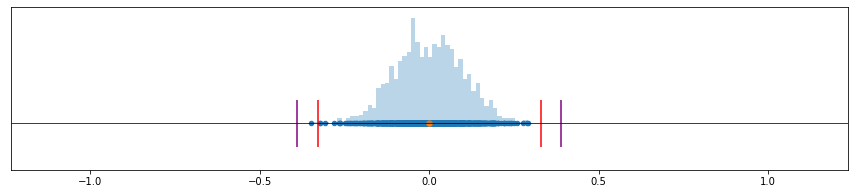

In [3]:
delta = 1e-3
estimates = []

mu=0.0
sigma=1.0
n=100

for i in range(int(1.0/delta)):
  Z = np.random.normal(loc=mu, scale=sigma, size=(n,))
  estimates.append(np.mean(Z))
estimates = np.array(estimates)

confidence_interval = ConfidenceInterval(mu, sigma, n)
confidence_interval.mark_gaussian_deviations(delta)
confidence_interval.mark_subgaussian_deviations(delta)
confidence_interval.mark_estimates(estimates)
confidence_interval.mark_true_mean()

We will want to repeat simulations such as the one performed above for different estimators and for different distributions. For this reason, we introduce abstract classes `Estimator` and `Distribution` and provide implementations for the `SampleMean` estimator as well as `GaussianDistribution`.

In [4]:
class Estimator(object):
  """ A base class for mean estimators. """

  def estimate_mean(self, Z):
    """ :Z: A numpy array of i.i.d. samples drawn from some unkown distribution.
        :returns: An estimate of the mean E_{Z \sim P}[Z].
    """
    raise NotImplementedError('The estimate_mean function should be '
                              'implemented by a subclass.')
    
class SampleMean(Estimator):
  """ The sample mean estimator. """

  def estimate_mean(self, Z):
    return np.mean(Z)


class Distribution(object):
  """ A base class for distributions. """

  def __init__(self, mu, sigma):
    """ :mu: The mean of this distribution.
        :sigma: The standard deviation of this distribution.
    """
    self.mu = mu
    self.sigma = sigma

  def generate_samples(self, n):
    """ Returns n independent samples drawn from this distribution. """
    raise NotImplementedError('The generate_samples function should be '
                              'implemented by a subclass.')    
    
    
class GaussianDistribution(Distribution):
  """ Gaussian distribution wrapped in the class Distribution. """

  def generate_samples(self, n):
    return np.random.normal(loc=self.mu, scale=self.sigma, size=(n,))

In [5]:
def verify_subgaussianity(estimator, distribution, delta, L, n=100, seed=None):
  """ This function marks an L-sub-Gaussian interval at confidence level delta
  and samples 1/delta independent outputs obtained via the given estimator on
  the given distribution with sample size n. """

  if seed is not None:
    np.random.seed(seed)

  n_runs = int(1.0/delta)
  estimates = np.zeros(n_runs)
  for idx in range(n_runs):
    Z = distribution.generate_samples(n)
    estimates[idx] = estimator.estimate_mean(Z)

  confidence_interval = ConfidenceInterval(
      distribution.mu, distribution.sigma, n)
  confidence_interval.mark_subgaussian_deviations(delta, L)
  confidence_interval.mark_estimates(estimates)
  confidence_interval.mark_true_mean()
  confidence_interval.ax.set_title(r'$\delta = $' + str(delta), size=20)

  return confidence_interval

In the below code cell we show an example simulation using the above function.

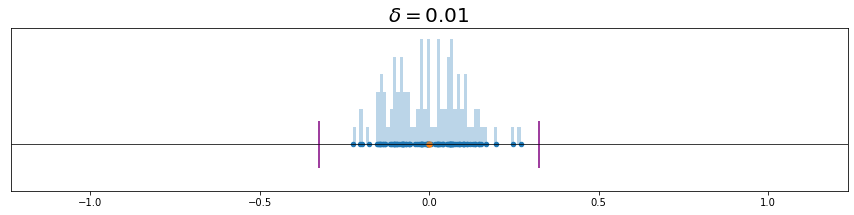

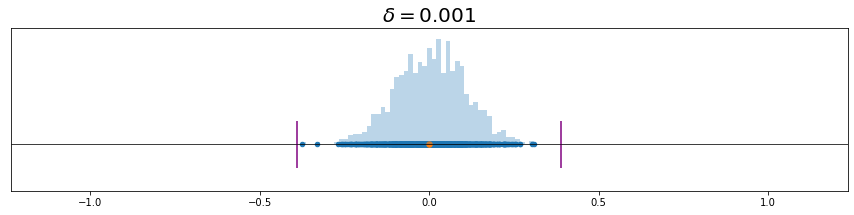

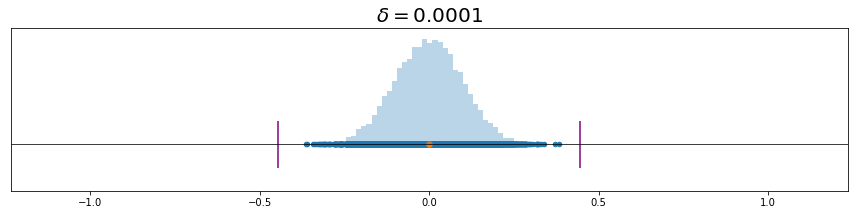

In [6]:
for delta in [1e-2, 1e-3, 1e-4]:
  verify_subgaussianity(
      estimator=SampleMean(),
      distribution=GaussianDistribution(mu=0.0, sigma=1.0),
      delta=delta,
      L = np.sqrt(2),
      n = 100)

## Is the Sample Mean Estimator L-Sub-Gaussian?

We have now formulated our goal: we aim to obtain an estimator $A$ that is $L$-sub-Gaussian for the class of distributions $\mathcal{P}_{\sigma^{2}}$ with
variance bounded by $\sigma^{2}$. We have also seen that the sample mean estimator $A^{(ERM)}$ is by definition $\sqrt{2}$-sub-Gaussian for the normal distribution $N(\mu, \sigma^{2})$. 
<font color='green'>**In the next exercise, we show that the sample mean estimator $A^{(ERM)}$ is $\sqrt{2}$-sub-Gaussian for the family of $\sigma^{2}$-sub-Gaussian distributions. Intuitively, this is a family of distributions whose tails decay as fast as those of the normally distributed random variable with variance $\sigma^{2}$.**</font>

### Exercise 2

Define a family of $\sigma^{2}$-sub-Gaussian distributions by
$$
  \mathcal{P}_{\sigma^{2}}^{\text{sub-Gaussian}}
  =
  \{
    P \in \mathcal{P}_{\sigma^{2}} :
    \forall \lambda \in \mathbb{R} \text{ we have }
    \mathbf{E}_{Z \sim P}[e^{\lambda(Z - \mathbf{E}[Z])}] \leq e^{\lambda^{2}\sigma^{2}/2}
  \}.
$$

Prove that the sample mean estimator $A^{(ERM)}$ is $\sqrt{2}$-sub-Gaussian for the family of distributions $\mathcal{P}_{\sigma^{2}}^{\text{sub-Gaussian}}$ uniformly over all confidence levels $\delta \in (0,1)$. That is, show that for any $n \geq 1$ and any $\delta \in (0,1)$ the following holds:
$$
  \sup_{P \in \mathcal{P}_{\sigma^{2}}^{\text{sub-Gaussian}}}
  \left\{
      \mathbb{P}_{Z_{1}^{n} \sim P^{n}}\left(
        \left|A^{(ERM)} - \mathbf{E}_{Z \sim P}[Z]\right|
        \geq \sqrt{\frac{2 \sigma^{2} \log(2/\delta)}{n}}
      \right)
  \right\}
  \leq \delta.
$$

#### Solution

Fix any distribution $P \in \mathcal{P}_{\sigma^{2}}^{\text{sub-Gaussian}}$. Using Chernoff's method we have for any $t > 0$:
\begin{align*}
  \mathbb{P}_{Z_{1}^{n}}\left(
    A^{(ERM)} - \mathbf{E}[Z] \geq t
  \right)
  &\leq
  \inf_{\lambda > 0} \left\{
    \frac{\mathbf{E}_{Z_{1}^{n}}[e^{\lambda(A^{(ERM)} - \mathbf{E}[Z])}]}
         {e^{\lambda t}} \right\}
  \\
  &=
  \inf_{\lambda > 0} \left\{
    \frac{\prod_{i=1}^{n}\mathbf{E}_{Z_{i}}[e^{\frac{\lambda}{n}(Z_{i} - \mathbf{E}[Z])}]}
         {e^{\lambda t}} \right\}
  \\
  &\leq
  \inf_{\lambda > 0} \left\{
    \frac{\prod_{i=1}^{n}
         e^{\left(\frac{\lambda}{n}\right)^{2}\sigma^{2}/2}}
         {e^{\lambda t}} \right\}
  & \text{since }Z\text{ is }\sigma^{2}\ \text{-sub-Gaussian}.
  \\
  &\leq
  \inf_{\lambda > 0} \left\{
         e^{\lambda^{2}\sigma^{2}/(2n) - \lambda t}
         \right\}
  \\
  &= e^{-nt^{2}/(2\sigma^{2})}.
\end{align*}
Plugging in
$t = \sqrt{\frac{2\sigma^{2}\log(2/\delta)}{n}}$ we obtain
$$
  \mathbb{P}_{Z_{1}^{n}}
  \left(
    A^{(ERM)} - \mathbf{E}[Z]
    \geq
    \sqrt{\frac{2\sigma^{2}\log(2/\delta)}{n}}
  \right)
  \leq \frac{\delta}{2}.
$$
Via an identical argument we also have
$$
  \mathbb{P}_{Z_{1}^{n}}
  \left(
    \mathbf{E}[Z] - A^{(ERM)}
    \geq
    \sqrt{\frac{2\sigma^{2}\log(2/\delta)}{n}}
  \right)
  \leq \frac{\delta}{2}.
$$
The result follows by the union bound applied to the two inequalities above.

### Exercise 3

In the previous exercise we showed that the sample mean estimator
$A^{(ERM)}$ is $\sqrt{2}$-sub-Gaussian for the family of $\sigma^{2}$-sub-Gaussian distributions, a subset of distributions with bounded variance whose tails decay approximately as fast as those of a Gaussian random variable with variance $\sigma^{2}$. However, it does not mean that the sample mean estimator is uniformly sub-Gaussian for *all* distributions with variance at most $\sigma^{2}$, i.e., distributions in the set $\mathcal{P}_{\sigma^{2}}$.

One might argue via the Central Limit Theorem that for any $\delta \in (0,1)$
we have
$$
  \forall P \in \mathcal{P}_{\sigma^{2}}
  \quad
  \mathbb{P}_{Z_{1}^{n} \sim P^{n}}\left(
    \left|
      A^{(ERM)} - \mathbf{E}_{Z \sim P}[Z]
    \right|
    \geq 
    \frac{\Phi^{-1}(1 - \delta/2)\sigma}{\sqrt{n}}
  \right)
  \to \delta
  \text{ as }
  n \to \infty,
$$
where recall that $\Phi$ denotes the cumulative density function of the standard normal random variable.
<font color='green'>
**However, the Central Limit Theorem does not provide uniform non-asymptotic bounds (i.e., it is not clear for what values of the sample size $n$ the CLT "kicks in") and thus it is insufficient to establish that the sample mean estimator is sub-Gaussian for the family $\mathcal{P}_{\sigma^{2}}$. In the following exercise we show that the sample mean estimator is not $L$-sub-Gaussian for any constant $L > 0$.**
</font>

- **Exercise 3.1.** Using Chebyshev's inequality find some $t_{\delta} > 0$ such that for any $\delta \in (0,1)$ the sample mean estimator satisfies
$$
  \sup_{P \in \mathcal{P}_{\sigma^{2}}}
  \left\{
      \mathbb{P}_{Z_{1}^{n} \sim P^{n}}\left(
        \left|
          A^{(ERM)} - \mathbf{E}_{Z \sim P}[Z]
        \right|
        \geq t_{\delta}
      \right)
  \right\} \leq \delta.
$$
- **Exercise 3.2.** In the following code cell, implement a distribution $P \in \mathcal{P}_{\sigma^{2}}$ for which the sample mean-estimator fails to be $\sqrt{2}$-sub-Gaussian. Verify your construction visually in the generated plot by running the below code cell (see further comments therein).
- **Exercise 3.3.** Prove that there exists some absolute constant $c > 0$  and $n_{0} \in \mathbb{N}$ such that the following is true for any $n \geq n_{0}$ and any confidence level $\delta \in (0,1)$:
$$
  \sup_{P \in \mathcal{P}_{\sigma^{2}}}
  \left\{
      \mathbb{P}_{Z_{1}^{n} \sim P^{n}}\left(
        \left|
          A^{(ERM)} - \mathbf{E}_{Z \sim P}[Z]
        \right|
        \geq c\frac{\sigma}{\sqrt{n\delta}}
      \right)
  \right\} \geq \delta.
$$
Explain why the above inequality implies that the sample mean estimator is not $L$-sub-Gaussian (for the family of distributions $\mathcal{P}_{\sigma^{2}}$) for any constant $L > 0$.

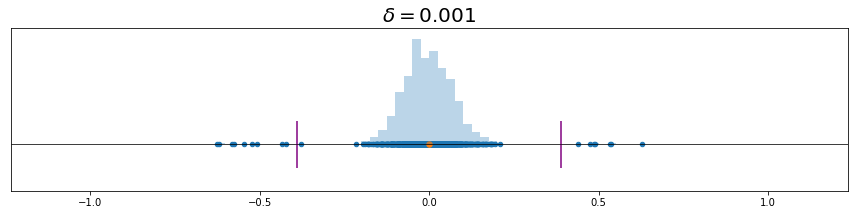

In [7]:
class BadDistribution(Distribution):
  """ A distributino on which the sample mean estimator is not sub-Gaussian. """

  def __init__(self, sigma, n, delta):
    """ This distribution is parameterized by the sample size n and the
    confidence level delta. """
    super().__init__(mu=0, sigma=sigma)
    self.n = n
    self.delta = delta

  def generate_samples(self, n):
    # See the solution of Exercise 3.3 for the details of this distribution.
    delta_prime = 20.0 * self.delta
    p = delta_prime/self.n
    Z = np.random.binomial(n=1, p=p, size=(n,))
    signs = np.random.binomial(n=1, p=0.5, size=(n,))*2.0-1.0
    Z = Z * signs
    Z = Z * np.sqrt(self.n / delta_prime) * (self.sigma / np.sqrt(2.0))
    # We add an independent random normal variable for a visual effect only.
    # Note that we have rescaled the variance by 1/np.sqrt(2.0) so that the
    # resulting random variable still has variance sigma^2.
    Z += np.random.normal(loc=0.0, scale=(self.sigma / np.sqrt(2.0)), size=(n,))
    return Z

# Executing the below block of code, you should see multiple points outside of
# the sqrt{2}-sub-Gaussian condifence interval marked by the purple lines.
# If, on the other hand, all of the observed samples concentrate within the
# sub-Gaussian interval marked by the purple lines, your implementation of
# BadDistribution class fails to visually establish that the sample mean
# estimator is not \sqrt{2}-sub-Gaussian.
n = 100
delta = 1e-3
verify_subgaussianity(
    estimator = SampleMean(),
    distribution = BadDistribution(sigma=1.0, n=n, delta=delta),
    delta = delta,
    L = np.sqrt(2),
    n=n)

#### Solution

**Exercise 3.1.** By Chebyshev's inequality, the following holds for any distribution $P \in \mathcal{P}_{\sigma^{2}}$ and any $t > 0$:
$$
  \mathbb{P}_{Z_{1}^{n} \sim P^{n}}\left(
    \left|
      A^{(ERM)} - \mathbf{E}_{Z \sim P}[Z]
    \right|
    \geq t
  \right)
  \leq \frac{\mathrm{Var}[Z]}{n t^{2}}
  \leq \frac{\sigma^{2}}{n t^{2}}.
$$
Setting $t = t_{\delta} = \frac{\sigma}{\sqrt{n\delta}}$ yields
$$
  \mathbb{P}_{Z_{1}^{n} \sim P^{n}}\left(
    \left|
      A^{(ERM)} - \mathbf{E}_{Z \sim P}[Z]
    \right|
    \geq \frac{\sigma}{\sqrt{n \delta}}
  \right)
  \leq \delta.
$$


**Exercise 3.2.** The below code block provides a sample implementation of a "bad" distribution for which the sample mean estimator fails to be sub-Gaussian.
The distribution implemented in this exercise is further discussed in the solution of Exercise 3.3.

The `generate_samples` function can be implemented as follows:
```
  def generate_samples(self, n):
    # See the solution of Exercise 3.3 for the details of this distribution.
    delta_prime = 20.0 * self.delta
    p = delta_prime/self.n
    Z = np.random.binomial(n=1, p=p, size=(n,))
    signs = np.random.binomial(n=1, p=0.5, size=(n,))*2.0-1.0
    Z = Z * signs
    Z = Z * np.sqrt(self.n / delta_prime) * (self.sigma / np.sqrt(2.0))
    # We add an independent random normal variable for a visual effect only.
    # Note that we have rescaled the variance by 1/np.sqrt(2.0) so that the
    # resulting random variable still has variance sigma^2.
    Z += np.random.normal(loc=0.0, scale=(self.sigma / np.sqrt(2.0)), size=(n,))
    return Z
```

**Exercise 3.3.** We will show that the upper bound shown to hold via an application of Chebyshev's inequality (see solution to Exercise 3.1) is tight up to some multiplicative absolute constant $c > 0$.

Given any sample size $n$ and any confidence level $\delta \in (0,1)$ define
the distribution
$$
  P_{n,\delta} = \begin{cases}
    0 & \text{with probability }1 - \frac{\delta'}{n},\\
    \sigma\sqrt{\frac{n}{\delta'}} & \text{with probability } \frac{\delta'}{2n},\\
    -\sigma\sqrt{\frac{n}{\delta'}} & \text{with probability } \frac{\delta'}{2n}.
  \end{cases}
$$
for some $\delta'$ to be specified later.

Then a random variable $Z \sim P_{n, \delta}$ satisfies $\mathbf{E}[Z] = 0$ and $\mathrm{Var}[Z] = \mathbf{E}[Z^{2}] = \sigma^{2}$. In particular, $P_{n,\delta} \in \mathcal{P}_{\sigma^{2}}$. 

Now notice that
\begin{align*}
  \mathbf{P}_{Z_{1}^{n} \sim P_{n,\delta}}\left(
    \left|
      A^{(ERM)}
    \right|
    \geq \frac{\sigma}{\sqrt{\delta'n}}
  \right)
  &\geq
  \mathbf{P}_{Z_{1}^{n}}\left(
    \left|
      \left\{
        i \in \{1, \dots, n\} : Z_{i} \neq 0
      \right\}
    \right|
    = 1
  \right)
  \\
  &= n \cdot \frac{\delta'}{n}
  \cdot
  \left(1 - \frac{\delta'}{n}\right)^{n-1}
\end{align*}
Now note that
$$
  \lim_{n\to\infty}\left(1 - \frac{\delta'}{n}\right)^{n-1} = e^{-\delta} \geq e^{-1}.
$$
Thus for large enough $n$ we have
$$
  \mathbf{P}_{Z_{1}^{n} \sim P_{n,\delta}}\left(
    \left|
      A^{(ERM)}
    \right|
    \geq \frac{\sigma}{\sqrt{\delta'n}}
  \right)
  \geq \frac{e^{-1}}{2} \delta'.
$$
Setting $\delta' = 2e\delta$ and $c = 1/\sqrt{2e}$ finishes our proof.

Now to see that the above construction rules out the possibility that the sample mean estimator is $L$-sub-Gaussian, it is enough to notice that for any $L > 0$ one can choose some small enough $\delta \in (0,1)$ such that
$$
  L\sigma\sqrt{\log(2/\delta)} \ll c\frac{\sigma}{\sqrt{\delta}}.
$$



## Catoni's Estimator

In the previous section we have established that the sample mean estimator is not $L$-sub-Gaussian for any constant $L > 0$. We will now present the idea based on influence functions due to Olivier Catoni that leads to an L-sub-Gaussian estimator $A^{(Catoni)}_{\sigma, \delta}$ with $L = \sqrt{2} + o(1)$. The estimator $A^{(Catoni)}$ is parametrized by the desired confidence level $\delta$ and the oracle knowledge of the standard deviation $\sigma$ of the unknown distribution $P \in \mathcal{P}_{\sigma^{2}}$. Removing the dependence on $\sigma$ is possible via Lepski's adaptation strategy (see the bibliographic remarks at the end of this notebook) at the expense of slightly worse bounds. On the other hand, the dependence on the desired confidence level $\delta$ is known to be unavoidable in order to obtain a sub-Gaussian estimator with respect to the class $\mathcal{P}_{\sigma^{2}}$. 

<font color='green'>**Before digging into the details, we remark that the tools used to derive a nearly optimal mean estimator are rather basic - one only needs to know Markov's inequality. It is remarkable that a creative application of such a simple technique allows us to obtain such a strong result.**</font>

Before we go into the details of Catoni's estimator, let us slightly rewrite the proof of Exercise 2, where we have demonstrated that the sample mean estimator $A^{(ERM)}$ is $\sqrt{2}$-sub-Gaussian for $\sigma^{2}$-sub-Gaussian random variables. First, notice that the estimator $A^{(ERM)}$ can be written as
$$
  A^{(ERM)} \in \{a \in \mathbb{R} : S_{n}(a) = 0\}
  \quad\text{where}\quad
  S_{n}(a) = \frac{1}{n}\sum_{i=1}^{n}(Z_{i} - a). \tag{3}
$$
Denote $\mu = \mathbf{E}[Z]$. Notice that the function $S_{n}(\cdot)$ is non-increasing. Thus, in order to show that $|A^{(ERM)} - \mu| \leq t_{\delta}$ with probability $1-\delta$, it is enough to find $t_{\delta}$ such that the following two inequalities hold simultaneously:
\begin{align*}
  \mathbb{P}_{Z_{1}^{n}}\left(S_{n}(\mu + t_{\delta}) > 0 \right)
  &\leq \delta/2, \\
  \mathbb{P}_{Z_{1}^{n}}\left(S_{n}(\mu - t_{\delta}) < 0 \right)
  &\leq \delta/2.
\end{align*}
In the special case when the random variable $Z$ is $\sigma^{2}$-sub-Gaussian, we have
\begin{align*}
  \mathbb{P}_{Z_{1}^{n}}\left(S_{n}(\mu + t_{\delta}) > 0 \right)
  &\leq \inf_{\lambda > 0} \left\{
    \mathbf{E}_{Z_{1}^{n}}[
    \exp(\lambda S_{n}(\mu + t_{\delta}))]
    \right\}
  \\
  &= \inf_{\lambda > 0}\left\{
     \exp(-\lambda t_{\delta})
    \prod_{i=1}^{n}\mathbf{E}_{Z_{i}}\left[
    \exp\left(\frac{\lambda}{n}(Z_{i} - \mu)\right)
    \right]
  \right\}
  \\
  &\leq \inf_{\lambda > 0} \left\{
    \exp\left(
    -\lambda t_{\delta} + \frac{\lambda^{2}\sigma^{2}}{2n}
    \right)
   \right\}
  &\text{since Z is }\sigma^{2}\text{-sub-Gaussian}
  \\
  &= \exp\left(
    -\frac{nt_{\delta}^{2}}{2\sigma^{2}}
    \right)
  &\text{by setting }\lambda = \frac{nt_{\delta}}{\sigma^{2}}.
\end{align*}
In an analogous way, we also have
\begin{align*}
  \mathbb{P}_{Z_{1}^{n}}\left(S_{n}(\mu - t_{\delta}) < 0 \right)
  &=
  \mathbb{P}_{Z_{1}^{n}}\left(-S_{n}(\mu - t_{\delta}) > 0 \right)
  \\
  &\leq \inf_{\lambda > 0} \left\{
    \mathbf{E}_{Z_{1}^{n}}[
    \exp(-\lambda S_{n}(\mu - t_{\delta}))]
    \right\}
  \\
  &= \inf_{\lambda < 0} \left\{
    \mathbf{E}_{Z_{1}^{n}}[
    \exp(\lambda S_{n}(\mu - t_{\delta}))]
    \right\}
  \\
  &= \inf_{\lambda < 0}\left\{
     \exp(\lambda t_{\delta})
    \prod_{i=1}^{n}\mathbf{E}_{Z_{i}}\left[
    \exp\left(\frac{\lambda}{n}(Z_{i} - \mu)\right)
    \right]
  \right\}
  \\
  &\leq \inf_{\lambda < 0} \left\{
    \exp\left(
    \lambda t_{\delta} + \frac{\lambda^{2}\sigma^{2}}{2n}
    \right)
   \right\}
  &\text{since Z is }\sigma^{2}\text{-sub-Gaussian}
  \\
  &= \exp\left(
    -\frac{nt_{\delta}^{2}}{2\sigma^{2}}
    \right)
  &\text{by setting }\lambda = -\frac{nt_{\delta}}{\sigma^{2}}.
\end{align*}
The choice $t_{\delta} = \sqrt{2 \sigma^{2} \log(2/\delta) / n}$ gives the desired result.

The crucial step in the derivations above is, of course, the use of sub-Gaussianity of the random variable $Z$ that allows us to upper bound the moment generating function $\mathbf{E}[e^{\lambda(Z - \mu)}]$. <font color='green'>**In general, a random variable $Z$ distributed according to some $P \in \mathcal{P}_{\sigma^{2}}$ need not have a well-defined moment generating function and the approach outlined above fails (as we have seen in Exercise 3, the sample mean estimator is not sub-Gaussian).**</font>

The idea of Catoni's estimator is to replace the definition of $A^{(ERM)}$ stated in equation $(3)$ by
$$
  A^{(Catoni)}_{\sigma, \delta} \in \{a \in \mathbb{R} : S^{\psi}_{n}(a) = 0\}
  \quad\text{where}\quad
  S_{n}^{\psi}(a) = \frac{1}{n}\sum_{i=1}^{n}\psi(Z_{i} - a),
$$
where $\psi$ is some suitably chosen *non-decreasing influence function*.
Notice that the choice $\psi(x) = x$ recovers the sample mean estimator. On the other hand, notice that the choice of $\psi(x)$ that grows much slower than $x$ would yield decreased influence of outliers arising through the potential heavy-tailedness of the unknown distribution of the random variable $Z$.

It remains to find an appropriate candidate function $\psi : \mathbb{R} \to \mathbb{R}$ that yields an $L$-sub-Gaussian estimator of the mean with respect to the class of distributions $\mathcal{P}_{\sigma^{2}}$.
We will attempt to find such $\mathcal{\psi}$ by working backwards in the derivations for the sample mean estimator presented above. 

Indeed, we want to find $\psi$ such that for some $\lambda > 0$ we have
\begin{align*}
      &\exp\left(
        -\lambda t_{\delta} + \frac{\lambda^{2}\sigma^{2}}{2n}
      \right)
  \\
  &\geq
      \exp\left(
        -\lambda t_{\delta} + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\sum_{i=1}^{n}
        \mathbf{E}_{Z_{i}}[(Z_{i} - \mu)^{2}]
      \right)
  &\text{since for }P\in \mathcal{P}_{\sigma^{2}} \text{ we have }\mathrm{Var}_{Z \sim P}[Z] \leq \sigma^{2}
  \\
  &=
      \prod_{i=1}^{n}
      \exp\left(
        \mathbf{E}_{Z_{i}}\left[
            \frac{\lambda}{n}(Z_{i} - (\mu + t_{\delta}))
            + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}(Z_{i} - \mu)^{2}
        \right]
      \right)
  \\
  &=
      \prod_{i=1}^{n}
      \exp\left(
        \mathbf{E}_{Z_{i}}\left[
            \frac{\lambda}{n}(Z_{i} - (\mu + t_{\delta}))
            + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
              Z_{i} - (\mu + t_{\delta})
            \right)^{2}
        \right]
        - \frac{1}{2}\frac{\lambda^{2}}{n^{2}}t_{\delta}^{2}
      \right)
  &\text{since }\mathbf{E}_{Z_{i}}[(X_{i} - \mu)^{2}] = \mathbf{E}_{Z_{i}}[(X_{i} - (\mu + t_{\delta}))^{2}] - t_{\delta}^{2}.
\end{align*}
Since we want to  rewrite the right hand side as a function of $S_{n}^{\psi}(\mu + t_{\delta})$, let us multiply both sides by $\exp(\lambda^{2}t_{\delta}^{2}/n)$. This yields, for any $\lambda > 0$:
\begin{align*}
    &\exp\left(
      -\lambda t_{\delta} + \frac{\lambda^{2}(\sigma^{2} + t_{\delta}^{2})}{2n}
    \right)
    \\
    &\geq
    \prod_{i=1}^{n}
    \exp\left(
      \mathbf{E}_{Z_{i}}\left[
          \frac{\lambda}{n}(Z_{i} - (\mu + t_{\delta}))
          + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu + t_{\delta})
          \right)^{2}
      \right]
    \right)
    \\
    &\geq \text{(... Exercise 4 ...)} \tag{4}
    \\
    &= \mathbf{E}_{Z_{1}^{n}}[
      \exp\left(S_{n}^{\psi}(\mu + t_{\delta})\right)]
    \\
    &\geq
    \mathbb{P}_{Z_{1}^{n}}\left(S_{n}^{\psi}(\mu + t_{\delta}) > 0\right).
\end{align*}
In a similar manner, for any $\lambda > 0$ we have:
\begin{align*}
    &\exp\left(
      -\lambda t_{\delta} + \frac{\lambda^{2}(\sigma^{2} + t_{\delta}^{2})}{2n}
    \right)
    \\
    &\geq
    \prod_{i=1}^{n}
    \exp\left(
      \mathbf{E}_{Z_{i}}\left[
          -\frac{\lambda}{n}(Z_{i} - (\mu - t_{\delta}))
          + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu - t_{\delta})
          \right)^{2}
      \right]
    \right)
    \\
    &\geq \text{(... Exercise 4 ...)} \tag{5}
    \\
    &= \mathbf{E}_{Z_{1}^{n}}[
      \exp\left(-S_{n}^{\psi}(\mu - t_{\delta})\right)]
    \\
    &\geq
    \mathbb{P}_{Z_{1}^{n}}\left(-S_{n}^{\psi}(\mu - t_{\delta}) > 0\right).
    \\
    &=
    \mathbb{P}_{Z_{1}^{n}}\left(S_{n}^{\psi}(\mu - t_{\delta}) < 0\right).
\end{align*}
We now turn to Exercise 4, where we are asked to fill in the missing details in equations $(4)$ and $(5)$ above by finding the desired influence function $\psi$.









### Exercise 4

Find a non-decreasing influence function $\psi = \psi_{n, \sigma, \delta}$ (i.e., your choice if $\psi$ is allowed to depend on $n, \sigma$ and $\delta$) that simultaneously satisfies the inequalities $(4)$ and $(5)$. Show that your choice of $\psi$ yields an estimator $A^{(Catoni)}_{\sigma, \delta}$ defined in $(3)$ that satisfies
$$
    \sup_{P \in \mathcal{P}_{\sigma^{2}}}
    \left\{
      \mathbb{P}_{Z_{1}^{n}}\left(
        \left|
          A^{(Catoni)}_{\sigma, \delta} - \mathbf{E}_{Z \sim P}[Z]
        \right|
        \geq
        \sqrt{\frac{
          2\sigma^{2}\log(2/\delta)
        }{
          n\left(1-\frac{2\log(2/\delta)}{n}\right)
        }}
      \right)
    \right\}
    \leq \delta.
$$
Notice that modulo the multiplicative term
$$\sqrt{\frac{1}{\left(1-\frac{2\log(2/\delta)}{n}\right)}} = o(1),$$
the confidence intervals guaranteed by the Catoni's estimator are as good as the confidence intervals we have obtained for the sample mean estimator applied to estimate the mean of sub-Gaussian distributions.

#### Hint

Applying the inequality $e^{x} \geq 1 + x$ valid for all $x \in \mathbb{R}$ to equation $(4)$ we have
\begin{align*}
    &\prod_{i=1}^{n}
    \exp\left(
      \mathbf{E}_{Z_{i}}\left[
          \frac{\lambda}{n}(Z_{i} - (\mu + t_{\delta}))
          + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu + t_{\delta})
          \right)^{2}
      \right]
    \right)
    \\
    &\geq
    \prod_{i=1}^{n}
    \mathbf{E}_{Z_{i}}\left[
      1 
      +
      \frac{\lambda}{n}(Z_{i} - (\mu + t_{\delta}))
      + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu + t_{\delta})
        \right)^{2}
    \right]
    \\
    &= \mathbf{E}_{Z_{1}^{n}}\left[
        \prod_{i=1}^{n}\left(
      1 
      +
      \frac{\lambda}{n}(Z_{i} - (\mu + t_{\delta}))
      + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu + t_{\delta})
        \right)^{2}
        \right)
    \right].
\end{align*}
Similarly, applying the inequality $e^{x} \geq 1 + x$ to equation $(5)$ we obtain
\begin{align*}
    &\prod_{i=1}^{n}
    \exp\left(
      \mathbf{E}_{Z_{i}}\left[
          -\frac{\lambda}{n}(Z_{i} - (\mu - t_{\delta}))
          + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu - t_{\delta})
          \right)^{2}
      \right]
    \right)
    \\
    &\geq
    \prod_{i=1}^{n}
    \mathbf{E}_{Z_{i}}\left[
      1 
      -
      \frac{\lambda}{n}(Z_{i} - (\mu - t_{\delta}))
      + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu - t_{\delta})
        \right)^{2}
    \right]
    \\
    &= \mathbf{E}_{Z_{1}^{n}}\left[
        \prod_{i=1}^{n}\left(
      1 
      -
      \frac{\lambda}{n}(Z_{i} - (\mu - t_{\delta}))
      + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu - t_{\delta})
        \right)^{2}
        \right)
    \right].
\end{align*}

#### Solution

Carrying on from the derivations in the hint, it is enough for the desired influence function $\psi$ to satisfy
$$
      1 
      +
      \frac{\lambda}{n}(Z_{i} - (\mu + t_{\delta}))
      + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu + t_{\delta})
        \right)^{2}
      = \exp\left(\frac{1}{n}\psi\left(Z_{i} - (\mu + t_{\delta})\right)\right)
$$
and
$$
      1 
      -
      \frac{\lambda}{n}(Z_{i} - (\mu - t_{\delta}))
      + \frac{1}{2}\frac{\lambda^{2}}{n^{2}}\left(
            Z_{i} - (\mu - t_{\delta})
        \right)^{2}
      = \exp\left(-\frac{1}{n}\psi\left(Z_{i} - (\mu - t_{\delta})\right)\right)
$$
Hence, it is enough for $\psi$ to simultaneously satisfy the following two identities for any $x \in \mathbb{R}$:
$$
  \log\left(1 + \frac{\lambda}{n}x + \frac{\lambda^{2}}{n^{2}}x^{2}\right)
  = \frac{1}{n}\psi(x)
  \quad\text{and}\quad
  \log\left(1 - \frac{\lambda}{n}x + \frac{\lambda^{2}}{n^{2}}x^{2}\right)
  = -\frac{1}{n}\psi(x).
$$
The following choice fulfills the two conditions above:
\begin{align}
  \psi(x) = \begin{cases}
    n\log\left(1 + \frac{\lambda}{n}x + \frac{\lambda^{2}}{n^{2}}x^{2}\right)
    &\text{for }x \geq 0, \\
    -n\log\left(1 - \frac{\lambda}{n}x + \frac{\lambda^{2}}{n^{2}}x^{2}\right)
    &\text{for }x < 0.
  \end{cases}
\end{align}

It remains to find the smallest value $t_{\delta} > 0$ such that for some $\lambda > 0$ the left hand sides of the chain of equations containing
$(4)$ and $(5)$ equal to $\delta/2$. It is thus enough to solve the equation
$$
  \frac{\delta}{2} = \exp\left(
      -\lambda t_{\delta} + \frac{\lambda^{2}(\sigma^{2} + t_{\delta}^{2})}{2n}
  \right)
$$
The right hand side above is optimized with the choice
$$
  \lambda = \frac{nt_{\delta}}{\sigma^{2} + t_{\delta}^{2}}.
$$
Hence,
\begin{align*}
  &\frac{\delta}{2}
  = 
  \exp\left(  
    -\frac{nt_{\delta}^{2}}{2(\sigma^{2} + t_{\delta}^{2})}
  \right)
  \\
  \implies&
  \frac{2\log(2/\delta)}{n} = \frac{t_{\delta}^{2}}{\sigma^{2} + t_{\delta}^{2}}
  \\
  \implies&
  \sqrt{\frac{2\sigma^{2}\log(2/\delta)}{n\left(1 - \frac{2\log(2/\delta)}{n}\right)}} = t_{\delta},
\end{align*}
which proves the desired confidence bound.

Finally, plugging in the values of $\lambda$ and $t_{\delta}$ computed above
yields the influence function $\psi$ defined as:
$$
  \psi(x) = \begin{cases}
    n\log\left(1 + \alpha x + \alpha^{2} x^{2}\right)
    &\text{for }x \geq 0, \\
    -n\log\left(1 - \alpha x + \alpha^{2} x^{2}\right)
    &\text{for }x < 0,
  \end{cases}
$$
where
$$
  \alpha = \frac{\lambda}{n} = \frac{t_{\delta}}{\sigma^{2} + t_\delta^{2}}.
$$


### Exercise 5

- Implement Catoni's estimator $A^{(Catoni)}_{\sigma, \delta}$ described in equation $(3)$ and the solution of Exercise 4.
- Use the estimator to estimate the mean of a
  - `GaussianDistribution`;
  - `BadDistribution` implemented in Exercise 3.

In [8]:
class CatonisEstimator(Estimator):
  """ An implementation of Catoni's estimator described in the solution of
  Exercise 4. """
 
  def __init__(self, sigma, delta):
    """ The estimator is parametrized by the oracle knowledge of the true
    standard deviation sigma (or an upper bound on it) and the desired
    confidence level delta. """
    self.sigma = sigma
    self.delta = delta
 
  def estimate_mean(self, Z):
    n = len(Z)
    t_delta = np.sqrt(2.0 * self.sigma**2 * np.log(2.0/self.delta))
    t_delta /= np.sqrt(n - 2.0*np.log(2.0/self.delta))
    alpha = t_delta / (self.sigma**2 + t_delta**2)
    return self.solve(Z, alpha)
 
  def psi(self, alpha, x):
    signs = np.sign(x)
    x_abs = x * signs
    unsigned_answer = np.log(1.0 + alpha*x_abs + alpha**2 * x_abs**2 / 2.0)
    return unsigned_answer * signs
 
  def Sn(self, alpha, x):
    return np.sum(self.psi(alpha, x))
 
  def solve(self, Z, alpha, accuracy = 1e-6):
    """ We will find an approximate solution to Sn(a) = 0 via binary search.
    """
    left_endpoint = 0.0
    right_endpoint = 0.0
 
    Delta = 1.0
    while self.Sn(alpha, Z - left_endpoint) < 0.0:
      left_endpoint -= Delta
      Delta *= 2.0
 
    Delta = 1.0
    while self.Sn(alpha, Z - right_endpoint) > 0.0:
      right_endpoint += Delta
      Delta *= 2.0
 
    while right_endpoint - left_endpoint > accuracy:
      midpoint = (right_endpoint + left_endpoint) / 2.0
      if self.Sn(alpha, Z - midpoint) > 0.0:
        left_endpoint = midpoint
      else:
        right_endpoint = midpoint
 
    return (left_endpoint + right_endpoint) / 2.0

#### Solution

Catoni's estimator can be implemented as follows:
```
class CatonisEstimator(Estimator):
  """ An implementation of Catoni's estimator described in the solution of
  Exercise 4. """

  def __init__(self, sigma, delta):
    """ The estimator is parametrized by the oracle knowledge of the true
    standard deviation sigma (or an upper bound on it) and the desired
    confidence level delta. """
    self.sigma = sigma
    self.delta = delta

  def estimate_mean(self, Z):
    n = len(Z)
    t_delta = np.sqrt(2.0 * self.sigma**2 * np.log(2.0/self.delta))
    t_delta /= np.sqrt(n - 2.0*np.log(2.0/self.delta))
    alpha = t_delta / (self.sigma**2 + t_delta**2)
    return self.solve(Z, alpha)

  def psi(self, alpha, x):
    signs = np.sign(x)
    x_abs = x * signs
    unsigned_answer = np.log(1.0 + alpha*x_abs + alpha**2 * x_abs**2 / 2.0)
    return unsigned_answer * signs

  def Sn(self, alpha, x):
    return np.sum(self.psi(alpha, x))

  def solve(self, Z, alpha, accuracy = 1e-6):
    """ We will find an approximate solution to Sn(a) = 0 via binary search.
    """
    left_endpoint = 0.0
    right_endpoint = 0.0

    Delta = 1.0
    while self.Sn(alpha, Z - left_endpoint) < 0.0:
      left_endpoint -= Delta
      Delta *= 2.0

    Delta = 1.0
    while self.Sn(alpha, Z - right_endpoint) > 0.0:
      right_endpoint += Delta
      Delta *= 2.0

    while right_endpoint - left_endpoint > accuracy:
      midpoint = (right_endpoint + left_endpoint) / 2.0
      if self.Sn(alpha, Z - midpoint) > 0.0:
        left_endpoint = midpoint
      else:
        right_endpoint = midpoint

    return (left_endpoint + right_endpoint) / 2.0
```

Below we apply the estimator to estimate the mean of Gaussian distribution.

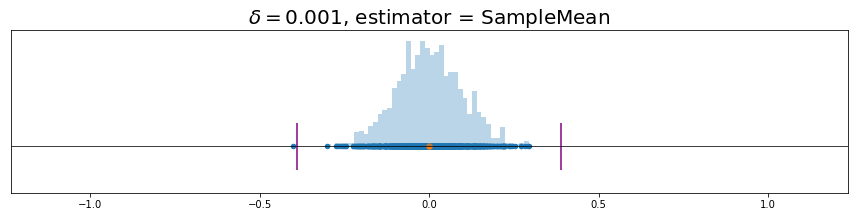

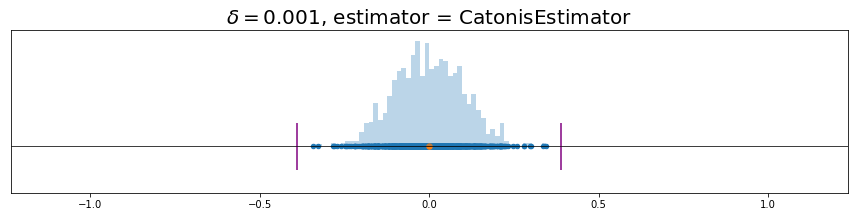

In [9]:
delta = 1e-3
sigma = 1.0
catonis_estimator = CatonisEstimator(sigma, delta)

for estimator in [SampleMean(), catonis_estimator]:
  confidence_interval = verify_subgaussianity(
      estimator=estimator,
      distribution=GaussianDistribution(mu=0.0, sigma=sigma),
      delta=delta,
      L = np.sqrt(2),
      n = 100)
  title = confidence_interval.ax.get_title()
  confidence_interval.ax.set_title(title + ', estimator = ' + \
                                   str(type(estimator).__name__), size=20)

Next, we apply the Catoni's distribution to estimate the mean of `BadDistribution` (i.e., the distribution for which the sample mean estimator fails to be sub-Gaussian).

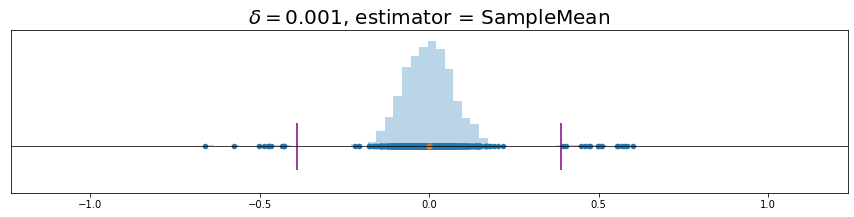

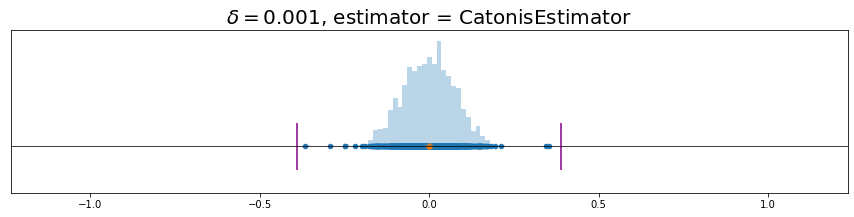

In [10]:
delta = 1e-3
sigma = 1.0
n = 100
catonis_estimator = CatonisEstimator(sigma, delta)
bad_distribution = BadDistribution(sigma, n, delta)

for estimator in [SampleMean(), catonis_estimator]:
  confidence_interval = verify_subgaussianity(
      estimator=estimator,
      distribution=bad_distribution,
      delta=delta,
      L = np.sqrt(2),
      n = n)
  title = confidence_interval.ax.get_title()
  confidence_interval.ax.set_title(title + ', estimator = ' + \
                                   str(type(estimator).__name__), size=20)

## Bibliographic Remarks

The study of statistical estimators robust to heavy-tailed distributions was initiated by *Catoni [2012]*, where sub-optimality of the sample mean estimator was established (cf. Exercise 3), and Catoni’s estimator of Exercise 4 was proposed; see the paper for extensions to variance estimation as well as removing the dependence on the unkown variance in the Catoni’s estimator. The dependence on the desired confidence level $\delta$, however, cannot be removed by any estimator unless one is willing to make additional distributional assumptions; see *Devroye, Lerasle, Lugosi, and Oliveira [2016]* for details as well as other results concerning real-valued mean estimation robust to heavy-tailed distributions. For results concerning vector-valued mean estimation see, for example, *Minsker [2015]*, *Lugosi and Mendelson [2019a]*; for results concerning regression under heavy-tailed data see, for example, *Audibert and Catoni [2011]*, *Lugosi and
Mendelson [2019b]*, *Lecué and Lerasle [2020]*, *Mourtada, Vaškevičius, and Zhivotovskiy [2021]*. The list of above-cited references is far from being exhaustive. See the recent survey by *Lugosi and Mendelson [2019c]* for further references and an excellent introduction to the subject.

**References**

J.-Y. Audibert and O. Catoni. Robust linear least squares regression. The Annals of Statistics, 39(5):2766–2794, 2011.


O. Catoni. Challenging the empirical mean and empirical variance: a deviation study. In Annales de l’IHP Probabilités et statistiques, volume 48, pages 1148–1185, 2012.


L. Devroye, M. Lerasle, G. Lugosi, and R. I. Oliveira. Sub-gaussian mean estimators. Annals of Statistics, 44(6):2695–2725, 2016.


G. Lecué and M. Lerasle. Robust machine learning by median-of-means: theory and practice. Annals of Statistics, 48(2):906–931, 2020.


G. Lugosi and S. Mendelson. Mean estimation and regression under heavy-tailed
distributions–a survey. arXiv preprint arXiv:1906.04280, 2019a.


G. Lugosi and S. Mendelson. Risk minimization by median-of-means tournaments. Journal of the European Mathematical Society, 22(3):925–965, 2019b.


G. Lugosi and S. Mendelson. Sub-gaussian estimators of the mean of a random vector. The Annals of Statistics, 47(2):783–794, 2019c.


S. Minsker. Geometric median and robust estimation in banach spaces. Bernoulli, 21(4): 2308–2335, 2015.


J. Mourtada, T. Vaškevičius, and N. Zhivotovskiy. Distribution-free robust linear regression. arXiv preprint arXiv:2102.12919, 2021.

